# Consignes projet 4

**Anticipez les besoins en consommation électrique de bâtiments**
* Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment
* Lien vers score Star Energy : https://www.energystar.gov/

* Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [1]:
%pip install cython
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 988.1/988.1 kB 23.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

# Chargement jeu de données

In [4]:
data = pd.read_csv('data/data_cleaned.csv')

In [5]:
data.head()

index  OSEBuildingID  DataYear        BuildingType  \
0  0      1              2016      NonResidential       
1  3      5              2016      NonResidential       
2  5      9              2016      Nonresidential COS   
3  6      10             2016      NonResidential       
4  7      11             2016      NonResidential       

                   PrimaryPropertyType  CouncilDistrictCode Neighborhood  \
0  Residence/Hotel/Senior Care/Housing  7                    DOWNTOWN      
1  Residence/Hotel/Senior Care/Housing  7                    DOWNTOWN      
2  Other                                7                    DOWNTOWN      
3  Residence/Hotel/Senior Care/Housing  7                    DOWNTOWN      
4  Other                                7                    DOWNTOWN      

   Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0  47.61220 -122.33799  1927       1.0                12               
1  47.61412 -122.33664  1926       1.0                10               
2  47.61623 -122.33657  1999       1.0                2                
3  47.61390 -122.33283  1926       1.0                11               
4  47.61327 -122.33136  1926       1.0                8                

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0  88434             0                   88434                    
1  61320             0                   61320                    
2  97288             37198               60090                    
3  83008             0                   83008                    
4  102761            0                   102761                   

                LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0  Residence/Hotel/Senior Care/Housing  88434.0                     
1  Residence/Hotel/Senior Care/Housing  61320.0                     
2  Offices                              88830.0                     
3  Residence/Hotel/Senior Care/Housing  81352.0                     
4  Leisure                              102761.0                    

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0  Other                        0.0                               
1  Other                        0.0                               
2  Other                        0.0                               
3  Other                        0.0                               
4  Other                        0.0                               

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0  Other                       0.0                              
1  Other                       0.0                              
2  Other                       0.0                              
3  Other                       0.0                              
4  Other                       0.0                              

   ENERGYSTARScore  SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  \
0  60.0             7456910.0              Normal  249.98              
1  56.0             6946800.5              Normal  286.43              
2 NaN               12581712.0             Normal  301.81              
3  27.0             6062767.5              Normal  176.14              
4 NaN               7067881.5              Normal  221.51              

   Log2-SiteEnergyUseWN(kBtu)  
0  22.830147                   
1  22.727917                   
2  23.584825                   
3  22.531545                   
4  22.752847

In [6]:
data.dtypes

index                              int64  
OSEBuildingID                      int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier    

In [7]:
data.shape

(2961, 26)

In [8]:
# # Liste des colonnes à conserver
# selected_columns = ['BuildingType', 'PrimaryPropertyType', 
#                     'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
#                     'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore','Log2-SiteEnergyUseWN(kBtu)']

# # Suppression des colonnes non sélectionnées
# data = data[selected_columns]
# 	index	DataYear	BuildingType	PrimaryPropertyType	CouncilDistrictCode	Neighborhood	YearBuilt	NumberofBuildings	NumberofFloors	PropertyGFATotal	PropertyGFAParking	PropertyGFABuilding(s)	LargestPropertyUseType	LargestPropertyUseTypeGFA	SecondLargestPropertyUseType	SecondLargestPropertyUseTypeGFA	ThirdLargestPropertyUseType	ThirdLargestPropertyUseTypeGFA	ENERGYSTARScore	SiteEnergyUseWN(kBtu)	Outlier	Latitude	Longitude	TotalGHGEmissions	Log2-SiteEnergyUseWN(kBtu)
# index
# DataYear
# BuildingType
# PrimaryPropertyType
# CouncilDistrictCode
# Neighborhood
# YearBuilt
# NumberofBuildings 
# NumberofFloors
# PropertyGFATotal
# PropertyGFAParking
# PropertyGFABuilding(s)
# LargestPropertyUseType
# LargestPropertyUseTypeGFA
# SecondLargestPropertyUseType
# SecondLargestPropertyUseTypeGFA
# ThirdLargestPropertyUseType
# ThirdLargestPropertyUseTypeGFA
# ENERGYSTARScore
# SiteEnergyUseWN(kBtu)
# Outlier
# Latitude
# Longitude
# TotalGHGEmissions
# Log2-SiteEnergyUseWN(kBtu)

In [9]:
data.dtypes

index                              int64  
OSEBuildingID                      int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier    

In [10]:
data.isna().sum().sum()

777

In [11]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)

In [12]:
data.shape

(2961, 25)

In [13]:
data.isna().sum().sum()

0

# Préparation des vecteurs et matrices

## Séparation X et y 

In [14]:
y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

## Normalisation & One Hot Encoder 

In [15]:
X.select_dtypes(['category','object']).nunique()

BuildingType                    8 
PrimaryPropertyType             12
Neighborhood                    13
LargestPropertyUseType          12
SecondLargestPropertyUseType    12
ThirdLargestPropertyUseType     11
Outlier                         3 
dtype: int64

In [16]:
X.shape

(2961, 22)

In [17]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int8','int64','int32','float32','float64']).columns

In [18]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier'],
      dtype='object')

In [19]:
numerical_columns

Index(['index', 'OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

In [20]:
numerical_columns_y = y.select_dtypes(['int8','int64','int32','float32','float64']).columns
numerical_columns_y

Index(['Log2-SiteEnergyUseWN(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit_transform(X[categorical_columns])

X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names_out().tolist(),
              data = ohe.fit_transform(X[categorical_columns])),
        left_index = True, right_index = True)

Transformation des types des catégories sorties du one hot encoding

In [23]:
import re
regex = re.compile(r'x\d_')
for column in X.columns:
    if regex.search(column):
        X[column] = X[column].astype('int32')

In [25]:
X.sample(5)

index  OSEBuildingID  DataYear  CouncilDistrictCode  Latitude  \
2410  1.072143  0.449778       0.0      -0.660695             0.290909   
1068 -0.459786 -0.007403       0.0       1.236801            -0.109409   
886  -0.674425 -0.066613       0.0       1.236801             0.138306   
1351 -0.136777  0.091510       0.0       1.236801             0.645151   
1457 -0.014727  0.139462       0.0       0.762427             1.183277   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
2410  2.200957  -0.198030  -0.052214           0.418641         
1068 -0.687588   1.227470  -0.052214           0.657163         
886  -0.853679  -1.198912  -0.052214          -0.296924         
1351 -1.469190  -0.198030  -0.052214          -0.535445         
1457 -0.750342   0.681534  -0.052214          -0.058402         

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2410  0.080949         -0.233533            0.172032                 
1068  1.175059         -0.233533            1.449247                 
886  -0.492945         -0.145077           -0.527274                 
1351 -0.592132         -0.233533           -0.613692                 
1457 -0.336178         -0.233533           -0.314902                 

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
2410  0.059666                  -0.373022                          
1068  1.680921                   1.129263                          
886  -0.453354                  -0.280875                          
1351 -0.565329                  -0.373022                          
1457 -0.458804                   0.067219                          

      ThirdLargestPropertyUseTypeGFA  BuildingType_Campus  \
2410 -0.160052                        0.0                   
1068 -0.160052                        0.0                   
886  -0.160052                        0.0                   
1351 -0.160052                        0.0                   
1457 -0.160052                        0.0                   

      BuildingType_Multifamily HR (10+)  BuildingType_Multifamily LR (1-4)  \
2410  0.0                                0.0                                 
1068  0.0                                0.0                                 
886   0.0                                1.0                                 
1351  0.0                                0.0                                 
1457  0.0                                1.0                                 

      BuildingType_Multifamily MR (5-9)  BuildingType_NonResidential  \
2410  1.0                                0.0                           
1068  1.0                                0.0                           
886   0.0                                0.0                           
1351  0.0                                1.0                           
1457  0.0                                0.0                           

      BuildingType_Nonresidential COS  BuildingType_Nonresidential WA  \
2410  0.0                              0.0                              
1068  0.0                              0.0                              
886   0.0                              0.0                              
1351  0.0                              0.0                              
1457  0.0                              0.0                              

      BuildingType_SPS-District K-12  PrimaryPropertyType_Education  \
2410  0.0                             0.0                             
1068  0.0                             0.0                             
886   0.0                             0.0                             
1351  0.0                             0.0                             
1457  0.0                             0.0                             

      PrimaryPropertyType_Facility  PrimaryPropertyType_Health  \
2410  0.0                           0.0                          
1068  0.0                           0.0                          
886   0.0 

## Infos sur X et y

In [26]:
X.shape

(2961, 86)

In [27]:
y.shape

(2961, 3)

# Séparation jeu de données

**Séparation test / train**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, 
                                         y['Log2-SiteEnergyUseWN(kBtu)'],  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [29]:
X_train.shape

(2368, 86)

In [30]:
X_test.shape

(593, 86)

In [31]:
y_train.shape

(2368,)

In [32]:
y_test.shape

(593,)

In [33]:
results = pd.DataFrame({})

In [34]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())


0
0
0
0


# Modélisation

**Imports**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Linear Regression / Ridge Regression / Lasso / Elastic Net

Le modèle Elastic Net comprend les modèles linéaires / ridge et lasso via les valeurs des coefficients dans le grid search CV

In [36]:
from sklearn.linear_model import ElasticNet

#rappel de la fonction de coût du elasticnet
#1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [37]:
elastic_grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.4, 'tol': 0.1}

{'alpha': 0.001, 'l1_ratio': 0.9, 'tol': 0.001}

Le modèle optimal a les caractéristiques suivantes:
* alpha = 0.001 : le terme de régularisation Lasso (L1) est quasiment nul mais il ne s'agit pas de notre paramètre le plus faible dasn le grid search CV
* le terme l1_ratio est approximativement de 0.4, signifiant que le poids du L1 est plus important que celui du L2 dans la régularisation 

In [38]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [39]:
import math
from sklearn.metrics import mean_squared_error, average_precision_score, r2_score
seuil = 1
# Calcul du RMSE
y_pred_test = elastic_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE:", rmse)

# Conversion des valeurs réelles en classe binaire
y_true_class = np.where(y_test > seuil, 1, 0)  # Remplacez le seuil par la valeur appropriée

# Calcul du MAP
map_score = average_precision_score(y_true_class, y_pred_test)
print("MAP:", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²:", r2)
print("test R²:", r2)
print("R²:", r2)
print("test R²:", r2)


RMSE: 2.1830215247785
MAP: 0.9840000696855367
R²: 0.09160694256673563
test R²: 0.09160694256673563
R²: 0.09160694256673563
test R²: 0.09160694256673563


## Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [41]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.5s
[CV] END max_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [42]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}

<!-- {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300} -->
{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 300}

Cette commande qui permet d'afficher les meilleurs paramètres choisis par la méthode de recherche par grille (GridSearchCV) pour un modèle de régression aléatoire (RandomForestRegressor).

Plus précisément, la méthode best_params_ de l'objet rfr_search renvoie un dictionnaire de paramètres avec leurs valeurs correspondantes, qui ont donné la meilleure performance lors de la validation croisée. Dans votre cas, les paramètres suivants ont été sélectionnés comme les meilleurs :

- max_features: Cette option détermine le nombre maximum de fonctionnalités à utiliser pour chaque arbre de décision dans la forêt aléatoire. Ici, la valeur "sqrt" est choisie, ce qui signifie que le nombre de fonctionnalités sera égal à la racine carrée du nombre total de fonctionnalités dans l'ensemble de données.
- min_samples_leaf: Cet hyperparamètre est le nombre minimum d'échantillons requis pour être au niveau de la feuille d'un arbre de décision. Une valeur de 3 a été choisie ici, ce qui signifie qu'un nœud doit avoir au moins 3 échantillons pour être considéré comme une feuille.
- n_estimators: Cet hyperparamètre détermine le nombre d'arbres dans la forêt aléatoire. Ici, une valeur de 300 a été choisie.
En utilisant ces paramètres pour entraîner le modèle de régression aléatoire, vous devriez obtenir la meilleure performance possible.

In [43]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [44]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

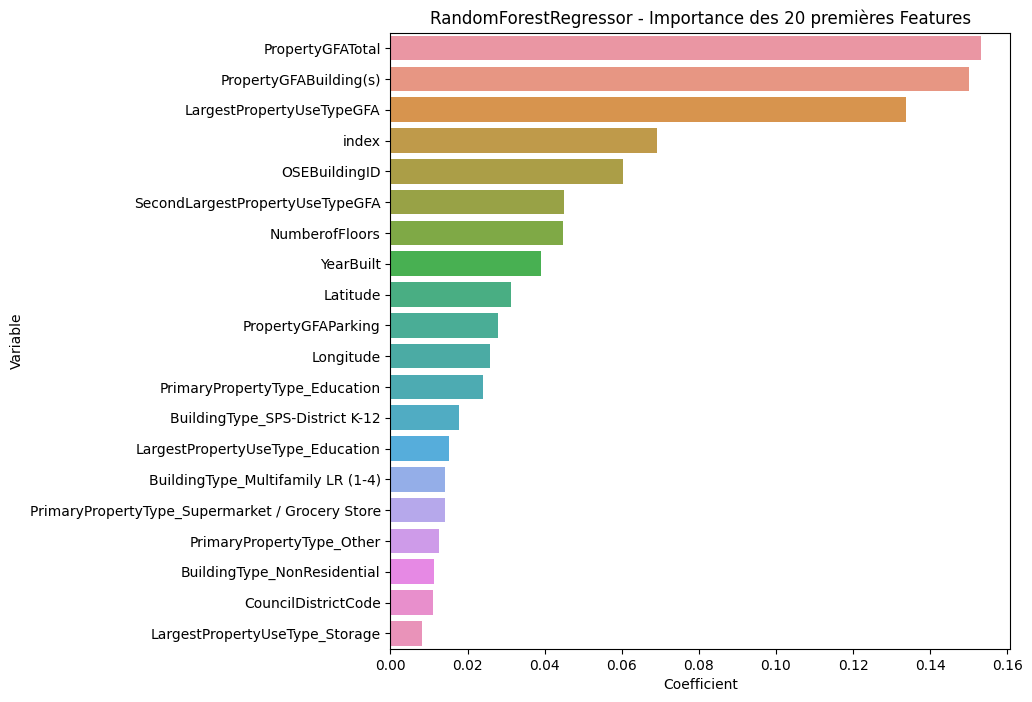

In [45]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

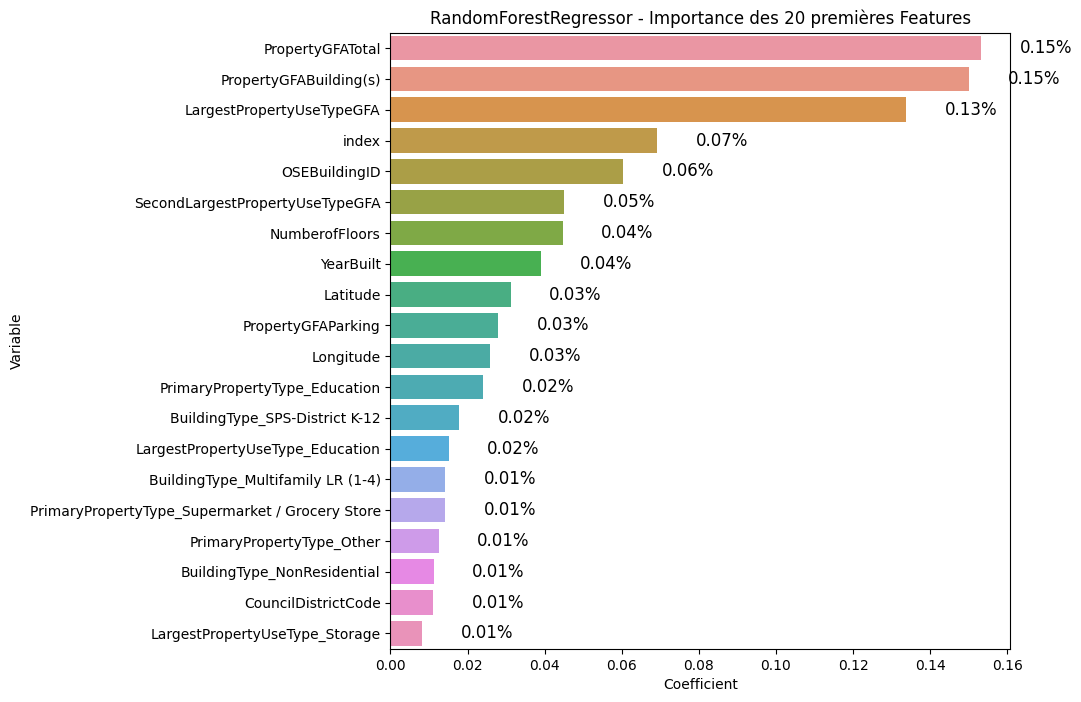

In [46]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')

# Créer le graphique à barres
barplot = sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))

# Parcourir toutes les barres et ajouter les pourcentages correspondants
for p in barplot.patches:
    width = p.get_width()    # Récupérer la largeur de la barre
    plt.text(width + 0.01,    # Ajouter un petit décalage
             p.get_y() + p.get_height() / 2,    # Récupérer la hauteur de la barre
             f'{width:.2f}%',    # Ajouter le pourcentage en format string
             ha='left',    # Aligner à gauche
             va='center',    # Centrer verticalement
             fontsize=12)    # Taille de la police

plt.show()


## Support Vector Regression 

In [47]:
from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.2s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.3s
[CV] END ................C=0.001, epsilon=0.00

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             verbose=2)

In [48]:
svm.best_params_

{'C': 10, 'epsilon': 1, 'gamma': 0.01}

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01}

In [49]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

In [50]:
results

Modèle  Score_RMSE
0  Elasticnet Regression    2.183022  
1  Random Forest Regressor  2.105512  
2  Support Vector Machine   2.067881

## XG Boost 

In [51]:
from xgboost import XGBRegressor

In [52]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................n_estimators=100;, score=0.323 total time=   0.3s
[CV 2/5] END ..................n_estimators=100;, score=0.170 total time=   0.3s
[CV 3/5] END .................n_estimators=100;, score=-0.273 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.265 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.109 total time=   0.2s
[CV 1/5] END ..................n_estimators=500;, score=0.323 total time=   1.0s
[CV 2/5] END ..................n_estimators=500;, score=0.159 total time=   1.1s
[CV 3/5] END .................n_estimators=500;, score=-0.285 total time=   1.0s
[CV 4/5] END ..................n_estimators=500;, score=0.260 total time=   1.1s
[CV 5/5] END ..................n_estimators=500;, score=0.105 total time=   1.1s
[CV 1/5] END .................n_estimators=1000;, score=0.323 total time=   1.5s
[CV 2/5] END .................n_estimators=1000;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=5)

In [53]:
xgb_grid.best_params_

{'n_estimators': 100}

In [54]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
xgb_grid.best_estimator_.feature_importances_

array([0.0172437 , 0.00763492, 0.        , 0.00375084, 0.01635371,
       0.01213009, 0.01489676, 0.00534848, 0.00497046, 0.06256813,
       0.01762199, 0.00342445, 0.00860605, 0.00391601, 0.0050505 ,
       0.00228607, 0.00102529, 0.01680081, 0.01906743, 0.00846416,
       0.01749133, 0.        , 0.05844416, 0.0371611 , 0.00087882,
       0.00221139, 0.01482456, 0.        , 0.00533556, 0.04505291,
       0.00512459, 0.00258915, 0.00280786, 0.07853413, 0.00266864,
       0.02978549, 0.08043644, 0.03162608, 0.00433613, 0.00061936,
       0.00302719, 0.01280841, 0.01034061, 0.00226522, 0.00212557,
       0.05320893, 0.00343705, 0.        , 0.02729409, 0.00665616,
       0.03414775, 0.00255477, 0.00223928, 0.0041721 , 0.0029573 ,
       0.01466359, 0.        , 0.01475552, 0.0057223 , 0.038376  ,
       0.00108139, 0.00367092, 0.00232904, 0.0144336 , 0.00477268,
       0.00174981, 0.00415772, 0.00929992, 0.        , 0.00448744,
       0.00304637, 0.00495747, 0.00049936, 0.00225009, 0.00038

In [56]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [57]:
results

Modèle  Score_RMSE
0  Elasticnet Regression    2.183022  
1  Random Forest Regressor  2.105512  
2  Support Vector Machine   2.067881  
3  XGBoost                  2.070355

## Export des modèles pour réutilisation ultérieure

In [58]:
rfr_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [59]:
dict_modeles = {
    'Elastic Net': elastic_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'SVM' : svm.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,
}

In [60]:
import pickle
for nom, model in dict_modeles.items():
    filename = 'models/' + nom + '.obj' 
    with  open(filename, 'wb') as filehandler :
        pickle.dump(model, filehandler)

In [61]:
#Export du one hot encoder

with  open('models/onehotencoder.obj', 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export du standardscaler
with  open('models/standardscaler.obj', 'wb') as filehandler :
    pickle.dump(ss, filehandler)

## Chargement des modèles

In [62]:
dict_modeles_new = dict_modeles

In [63]:
dict_modeles_new = {}

In [64]:
import glob
import pickle
for filename in glob.glob('models/*'):
    if filename not in ['models\onehotencoder.obj', 'models\standardscaler.obj']:
        with open(filename, 'rb') as filehandler:
            print(filename)
            dict_modeles_new[str(filename)] = pickle.load(filehandler)

models/Random Forest Regressor.obj
models/rfr_emissions.obj
models/SVM.obj
models/XGBoost.obj
models/onehotencoder.obj
models/standardscaler.obj
models/Elastic Net.obj


In [71]:
dict_modeles_new['models/XGBoost.obj'].feature_importances_

array([0.0172437 , 0.00763492, 0.        , 0.00375084, 0.01635371,
       0.01213009, 0.01489676, 0.00534848, 0.00497046, 0.06256813,
       0.01762199, 0.00342445, 0.00860605, 0.00391601, 0.0050505 ,
       0.00228607, 0.00102529, 0.01680081, 0.01906743, 0.00846416,
       0.01749133, 0.        , 0.05844416, 0.0371611 , 0.00087882,
       0.00221139, 0.01482456, 0.        , 0.00533556, 0.04505291,
       0.00512459, 0.00258915, 0.00280786, 0.07853413, 0.00266864,
       0.02978549, 0.08043644, 0.03162608, 0.00433613, 0.00061936,
       0.00302719, 0.01280841, 0.01034061, 0.00226522, 0.00212557,
       0.05320893, 0.00343705, 0.        , 0.02729409, 0.00665616,
       0.03414775, 0.00255477, 0.00223928, 0.0041721 , 0.0029573 ,
       0.01466359, 0.        , 0.01475552, 0.0057223 , 0.038376  ,
       0.00108139, 0.00367092, 0.00232904, 0.0144336 , 0.00477268,
       0.00174981, 0.00415772, 0.00929992, 0.        , 0.00448744,
       0.00304637, 0.00495747, 0.00049936, 0.00225009, 0.00038

## Comparaison des modèles

Comparons les modèles sur le critère de la RMSE divisée par la moyenne de la valeur à prédire

In [72]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

In [73]:
results 

Modèle  Score_RMSE    RMSE_%
0  Elasticnet Regression    2.183022    0.104631
1  Random Forest Regressor  2.105512    0.100916
2  Support Vector Machine   2.067881    0.099113
3  XGBoost                  2.070355    0.099231

La RMSE relative des meilleurs modèles est de 3,0 % (racine de l'erreur quadratique moyenne ramenée à la valeur à prédire), c'est une performance remarquable.

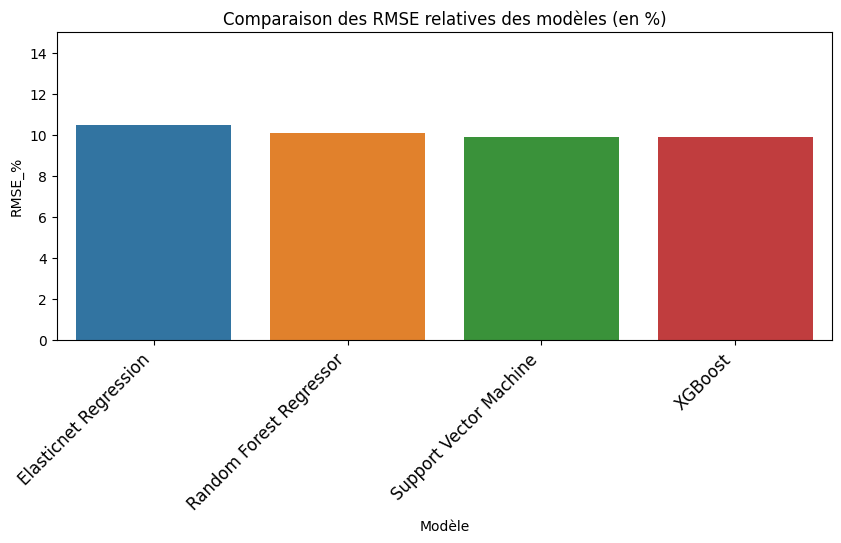

In [74]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x = results['Modèle'],
           y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 15])
plt.show()

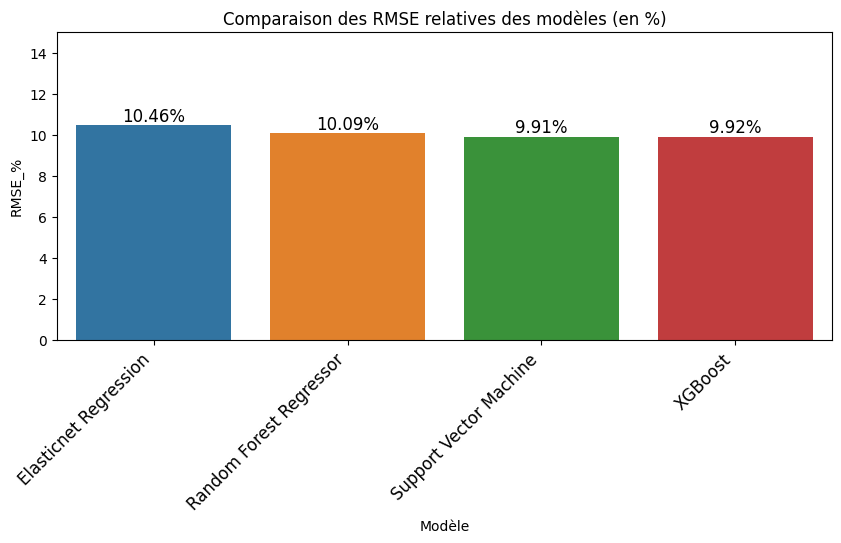

In [75]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x=results['Modèle'], y=results['RMSE_%']*100)

# Ajouter les pourcentages au dessus de chaque barre
for i in range(len(results)):
    plt.text(x=i, y=results['RMSE_%'][i]*100+0.2, 
             s=f"{results['RMSE_%'][i]*100:.2f}%", 
             horizontalalignment='center', size=12)

chart.set_xticklabels(labels=results['Modèle'], rotation=45, 
                      horizontalalignment='right', size=12)
ax = plt.gca()
ax.set_ylim([0, 15])
plt.show()


Support Vector Machine et Elasticnet Regression sont les modèles avec la plus faible RMSE, avec une valeur très proche.

Regardons quel algorithme est entraîné le plus rapidement et prédit le plus rapidement, pour voir lequel sélectionner pour les étapes suivantes

Comparaison avec la RMSE pour un estimateur donnant la valeur moyenne

In [76]:
math.sqrt(mean_squared_error(y_train.mean()*np.ones(y_test.shape[0]), y_test))

2.2909439445225592

In [77]:
rfr_search.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5)

le modèle Random Forest semble plus rapide à entraîner

In [78]:
list(dict_modeles.keys())

['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']

In [79]:
list(dict_modeles_new.keys())

['models/Random Forest Regressor.obj',
 'models/rfr_emissions.obj',
 'models/SVM.obj',
 'models/XGBoost.obj',
 'models/onehotencoder.obj',
 'models/standardscaler.obj',
 'models/Elastic Net.obj']

In [80]:
dict_modeles.update(dict_modeles_new)
print(dict_modeles)
list(dict_modeles.keys())

{'Elastic Net': ElasticNet(alpha=0.001, l1_ratio=0.4, tol=0.1), 'Random Forest Regressor': RandomForestRegressor(max_features='sqrt', min_samples_leaf=5), 'SVM': SVR(C=10, epsilon=1, gamma=0.01), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...), 'models/Random Forest Regressor.obj': RandomForestReg

['Elastic Net',
 'Random Forest Regressor',
 'SVM',
 'XGBoost',
 'models/Random Forest Regressor.obj',
 'models/rfr_emissions.obj',
 'models/SVM.obj',
 'models/XGBoost.obj',
 'models/onehotencoder.obj',
 'models/standardscaler.obj',
 'models/Elastic Net.obj']

In [81]:
print(y_test.dtypes)

float64


In [82]:
print(X_test)

         index  OSEBuildingID  DataYear  CouncilDistrictCode  Latitude  \
1750  0.319856  0.227203       0.0       0.288053             1.548720   
1583  0.128365  0.175727       0.0       1.236801             0.062427   
2740  1.461438  0.747462       0.0      -0.660695            -0.017361   
736  -0.844873 -0.111901       0.0      -1.135069            -1.801568   
2687  1.396205  0.554191       0.0       0.288053             1.871680   
781  -0.795422 -0.101331       0.0      -0.660695            -0.252924   
1937  0.527130  0.283062       0.0       0.762427             1.441983   
807  -0.767014 -0.094027       0.0      -1.609443            -1.249070   
1736  0.305126  0.223164       0.0      -1.135069            -1.011288   
332  -1.352009  0.201508       0.0       1.236801            -0.388618   
2132  0.753342  0.353186       0.0      -0.660695            -0.146398   
2907  1.680285  2.450203       0.0      -0.660695            -0.039237   
2600  1.297303  0.523168       0.0    

In [84]:
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

math.sqrt(mean_squared_error(y_test, model.predict(X_test)))

2.070355497543864

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error


nom_modeles = ['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']
liste_modeles = [dict_modeles['models/Elastic Net.obj'],
                 dict_modeles['models/Random Forest Regressor.obj'],
                 dict_modeles['models/SVM.obj'],
                 dict_modeles['models/XGBoost.obj']
                ]

comparaison_score = pd.DataFrame(index = nom_modeles, columns = ['RMSE', 'R2', 'RMSE_relative'])

for nom_modele, modele in zip(nom_modeles, liste_modeles):
    comparaison_score.loc[nom_modele, 'RMSE'] = math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))
    comparaison_score.loc[nom_modele, 'R2'] = r2_score(y_test, modele.predict(X_test))

#normalisation RMSE
comparaison_score['RMSE_relative'] = comparaison_score['RMSE'].divide(comparaison_score['RMSE'].max())

In [ ]:
comparaison_score

RMSE        R2 RMSE_relative
Elastic Net              1.738929  0.39386   0.847772    
Random Forest Regressor  1.777553  0.366635  0.866602    
SVM                      1.686026  0.430181  0.82198     
XGBoost                  2.051177  0.156636  1.0

In [87]:
i=0
for modele in liste_modeles:
    print(nom_modeles[i], ': ')
    i+=1
    %timeit modele.predict(X_train)
    print('')

Elastic Net : 
2.59 ms ± 774 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Random Forest Regressor : 
18.8 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

SVM : 
107 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

XGBoost : 
2.42 ms ± 470 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



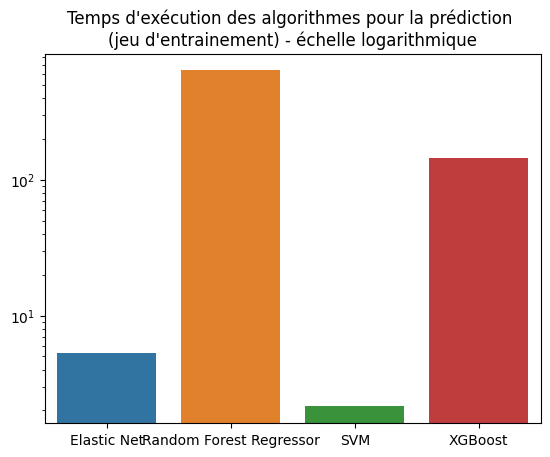

In [88]:
plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement) - échelle logarithmique')
sns.barplot(x=nom_modeles,
           y = [5.32, 640, 2.14, 145])
ax = plt.gca()
ax.set_yscale('log')

le temps d'exécution de XGBoost est plus faible que celui de random forest (4 fois plus faible), ce pourrait être un critère pour choisir éventuellement le XGBoost plutôt que le Random Forest Regressor (quite à dégrader légèrement la performance)

In [89]:
comparaison_score_melt = pd.melt(comparaison_score.reset_index(), id_vars = ['index'], value_name = 'score', value_vars=['R2', 'RMSE_relative'])

Text(0.5, 1.0, 'Comparaison des performances des modèles (jeu de test)')

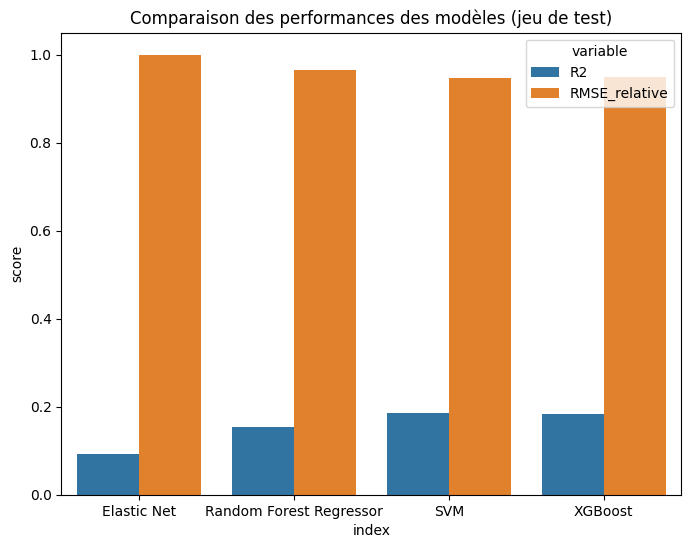

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(x = comparaison_score_melt['index'],
            y = comparaison_score_melt['score'], hue = comparaison_score_melt['variable'])
plt.title('Comparaison des performances des modèles (jeu de test)')

# Vérification des prédictions

Regardons avec un exemple ce que donne la prédiction

In [91]:
X_extrait = X_test
y_extrait = y_test

In [93]:
X_extrait.head()

index  OSEBuildingID  DataYear  CouncilDistrictCode  Latitude  \
1750  0.319856  0.227203       0.0       0.288053             1.548720   
1583  0.128365  0.175727       0.0       1.236801             0.062427   
2740  1.461438  0.747462       0.0      -0.660695            -0.017361   
736  -0.844873 -0.111901       0.0      -1.135069            -1.801568   
2687  1.396205  0.554191       0.0       0.288053             1.871680   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
1750  1.692540   0.014279  -0.052214          -0.058402         
1583 -0.734559   0.954502  -0.052214          -0.058402         
2740  0.504843   1.257799  -0.052214           0.418641         
736   2.422662   0.044609  -0.052214          -0.058402         
2687  0.844051   0.196257  -0.052214          -0.058402         

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1750 -0.589285         -0.233533           -0.610368                 
1583 -0.494880         -0.233533           -0.500164                 
2740  4.037796          5.618840            2.848001                 
736  -0.429126         -0.233533           -0.423405                 
2687 -0.549134         -0.233533           -0.563498                 

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
1750 -0.572276                  -0.373022                          
1583 -0.455743                  -0.373022                          
2740  2.229431                  -0.373022                          
736  -0.374576                  -0.373022                          
2687 -0.522714                  -0.373022                          

      ThirdLargestPropertyUseTypeGFA  BuildingType_Campus  \
1750 -0.160052                        0.0                   
1583 -0.160052                        0.0                   
2740 -0.160052                        0.0                   
736  -0.160052                        0.0                   
2687 -0.160052                        0.0                   

      BuildingType_Multifamily HR (10+)  BuildingType_Multifamily LR (1-4)  \
1750  0.0                                1.0                                 
1583  0.0                                1.0                                 
2740  0.0                                0.0                                 
736   0.0                                1.0                                 
2687  0.0                                1.0                                 

      BuildingType_Multifamily MR (5-9)  BuildingType_NonResidential  \
1750  0.0                                0.0                           
1583  0.0                                0.0                           
2740  1.0                                0.0                           
736   0.0                                0.0                           
2687  0.0                                0.0                           

      BuildingType_Nonresidential COS  BuildingType_Nonresidential WA  \
1750  0.0                              0.0                              
1583  0.0                              0.0                              
2740  0.0                              0.0                              
736   0.0                              0.0                              
2687  0.0                              0.0                              

      BuildingType_SPS-District K-12  PrimaryPropertyType_Education  \
1750  0.0                             0.0                             
1583  0.0                             0.0                             
2740  0.0                             0.0                             
736   0.0                             0.0                             
2687  0.0                             0.0                             

      PrimaryPropertyType_Facility  PrimaryPropertyType_Health  \
1750  0.0                           0.0                          
1583  0.0                           0.0                          
2740  0.0 

In [94]:
y_extrait.head()

1750    19.020969
1583    19.696943
2740    23.052560
736     20.172250
2687    19.489909
Name: Log2-SiteEnergyUseWN(kBtu), dtype: float64

In [95]:
prediction = dict_modeles['Random Forest Regressor'].predict(X_extrait)

Ramenons la prédiction à l'unité qu'on cherche à prédire (inverse du log2(y+1) soit exp2(y)-1

In [96]:
pd.DataFrame(prediction).isna().sum()

0    0
dtype: int64

In [97]:
type(y_extrait)

pandas.core.series.Series

In [98]:
predictions = pd.DataFrame([y_extrait, 
                            pd.Series(prediction, index = y_extrait.index),
                           np.exp2(y_extrait)-1,
                           np.exp2(pd.Series(prediction, index = y_extrait.index))-1]).T
predictions.columns = ['y_log', 'y_predict_log', 'y','y_predict']

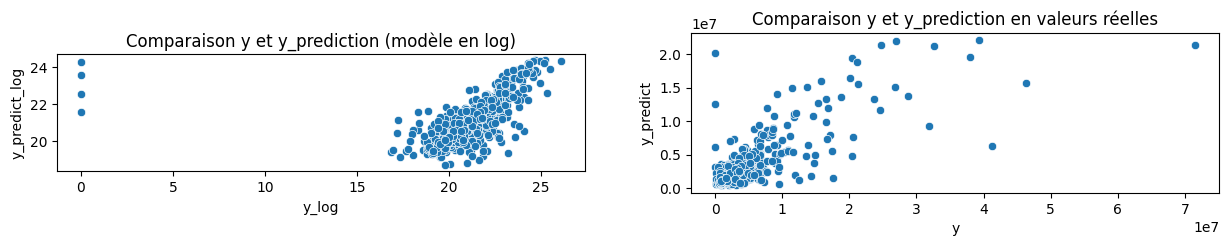

In [99]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.scatterplot(x = predictions['y_log'],
               y = predictions['y_predict_log'],
               ax = ax1)
sns.scatterplot(x = predictions['y'],
               y = predictions['y_predict'],
               ax=ax2)
ax1.set_aspect('equal', 'box')

ax2.set_aspect('equal', 'box')

ax1.title.set_text('Comparaison y et y_prediction (modèle en log)')
ax2.title.set_text('Comparaison y et y_prediction en valeurs réelles')


# Pertinence des variables

## Permutations des variables

Afin de voir si toutes les features ont de l'influence sur nos resultats, essayons de voir l'influence sur notre métrique dans le cas de permutations des features et d'application de notre modèle de prédiction.

3 fonctions ont été testées. La dernière (permutation finale) est la plus pertinente.

Updates:
- permutation par ligne dans le one hot encoding (et non par colonne)
- utilisation du jeu de validation et non le jeu de  test
- mean squared error comme metrics
- cross validation à 3

In [100]:
X_train.shape

(2368, 86)

In [101]:
X_test.shape

(593, 86)

In [103]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

#on créee un dictionnaire pour les colonnes crées par le OHE, pour les retrouver dans l'application des permutations
text_columns =[] #les noms des colonnes qui correspondent à des vraies features (pré OHE)
prefixes = [] #les préfixes des colonnes liées à l'application du OHE
index_cols = [] #les indices des colonnes qui correspondent aux features pré OHE et à la première colonne de chaque feature du OHE
regex = re.compile(r'x/d_')
for j, column in enumerate(X.columns):
    if regex.search(column):
        if column[:2] not in prefixes:
            prefixes.append(column[:2])
            index_cols.append(j)
    else:
        text_columns.append(column)
        index_cols.append(j)
        
dict_OHE = {}
for prefix in prefixes:
    temp_list = []
    for column in X.columns:
        if prefix in column:
            temp_list.append(column)
    dict_OHE[prefix] = temp_list
    text_columns.append(prefix)

    
    
#préparation du jeu de données

X_train_permut, X_validation_permut, y_train_permut, y_validation = train_test_split(X_train,
                                        y_train,
                                        test_size=0.2,
                                        random_state=42
                                        )
#choix du modèle utilisé pour la permutation : 


#on boucle sur le nombre de features:
list_features = text_columns
features_score = pd.DataFrame({})

for num_feature in range(len(text_columns)):
    print ('\nBoucle {}.'.format(num_feature+1))
    scores = []
    #on entraine le modèle sur le jeu de données sans les éventuelles features supprimées
    model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, 
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    
    #pour chaque feature de X_test:
    for j, feature in zip(index_cols, list_features):
        
        X_validation_temp = X_validation_permut.copy()
        
        #si on identifie une feature en "X0_" : on fait une permutation sur plusieurs colonnes

        if regex.search(X_validation_permut.iloc[:,j].name):
            #print('chaine reconnue')
            prefixe = X_validation_permut.iloc[:,j].name[:2]
            for prefixe_col in dict_OHE[prefixe]:
                index_col = X_validation_permut.columns.get_loc(prefixe_col)
                X_columns_temp = X_validation_temp.iloc[:,index_col]
                #X_test_temp.iloc[:,index_col] = np.random.permutation(X_test_temp.iloc[:,index_col])
                #on permute l'ensemble du bloc du one hot encoding, ligne par ligne (pour ne pas voir plus de une valeur à 1 par ligne)
                #X_validation_temp.iloc[:,index_col] = np.take(X_columns_temp,
                #                                        np.random.permutation(X_columns_temp.shape[0]),
                #                                        axis=0,
                #                                        out=X_columns_temp)
                
                X_validation_temp.iloc[:,index_col] = np.random.permutation(X_columns_temp.T).T
                         
        #sinon on fait une permutation sur une seule colonne
        else:             
            X_validation_temp.iloc[:,j] = np.random.permutation(X_validation_temp.iloc[:,j])
        
        #entrainement du modèle / ajout du score
        scores.append(cross_val_score(model, 
                                      X_validation_temp, 
                                      y_validation, 
                                      cv=3, #################################################TEMP A MODIFIER !!
                                      scoring = 'neg_mean_squared_error',
                                      n_jobs = -1).mean())
        print('    j : {}, feature : {}, score : {}'.format(j, feature, scores[-1]))
        
    #on identifie la feature avec la RMSE la plus faible en valeur absolue
    #i.e. la feature qui a le moins d'impact sur le score
    feature_to_remove_index = scores.index(max(scores))
    
    
    #on stocke le nom de la feature et le score
    feature_name = X_train_permut.columns[index_cols[feature_to_remove_index]]
    print('feature name : ', feature_name)
    if regex.search(feature_name):
        feature_name = feature_name[:3]
        print('feature name : ', feature_name)

    features_score = pd.concat([features_score,
               pd.DataFrame({''
                   'feature' : feature_name,
                             'RMSE' : scores[feature_to_remove_index]
                            }, index = [0])
                               ])
    #Affichage des informations
    print ('\nBoucle {}. Feature {} supprimée  : score = {}'.format(
        num_feature+1, 
        list_features[feature_to_remove_index],
        scores[feature_to_remove_index], 
        min(scores)))
                
    #on identifie les numero de colonne des features à supprimer:
    
    if regex.search(feature_name):
        print('      indice colonne de base à supprimer : ', index_cols[feature_to_remove_index])
        print('      indice de la colonne correspondant à la prochaine feature OHE', index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]))
        liste_index = list(
            range(index_cols[feature_to_remove_index],
                  index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]])
                  ,1)
        )
    else:
        liste_index = index_cols[feature_to_remove_index]
    #on actualise la liste des features avec la feature en moins pour le prochain tour de boucle
    for k, indice in enumerate(index_cols):
        if index_cols.index(indice) > feature_to_remove_index:
            if type(liste_index) is int :
                index_cols[k] -= 1
            else:
                index_cols[k] -= len(liste_index)
        
    print('      index à supprimer ', liste_index)
    
    del list_features[feature_to_remove_index]
    if regex.search(feature_name):
        del dict_OHE[feature_name[:2]]
        
    del index_cols[feature_to_remove_index]
    
    print('      feature to remove index' , liste_index)
    print('      Colonnes supprimées : ', X_train_permut.columns[liste_index])
    X_train_permut.drop(X_train_permut.columns[liste_index] , axis = 1, inplace=True)
    X_validation_permut.drop(X_validation_permut.columns[liste_index] , axis = 1, inplace=True)
    #print(X_train_permut.columns)
    


Boucle 1.


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'poisson', 'absolute_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'absolute_error', 'friedman_mse', 'poisson'}. Got 'mse' instead.


In [ ]:
features_score

feature       RMSE
0  Latitude                        -7.133302 
0  x5_                             -7.162691 
0  NumberofFloors                  -7.199218 
0  PropertyGFAParking              -7.131037 
0  OSEBuildingID                   -7.155221 
0  PropertyGFATotal                -7.090919 
0  index                           -7.014539 
0  Longitude                       -7.002964 
0  NumberofBuildings               -6.916625 
0  x4_                             -6.813811 
0  x3_                             -6.302861 
0  x0_                             -6.853090 
0  YearBuilt                       -6.938025 
0  ThirdLargestPropertyUseTypeGFA  -6.866080 
0  DataYear                        -6.882379 
0  SecondLargestPropertyUseTypeGFA -6.884908 
0  x6_                             -6.820116 
0  LargestPropertyUseTypeGFA       -6.989683 
0  CouncilDistrictCode             -7.290176 
0  x2_                             -7.340992 
0  x1_                             -8.454304 
0  PropertyGFABuilding(s)          -12.583521

In [ ]:
graphe_features = features_score.reset_index().drop(['index'], axis=1).reset_index()
graphe_features['index'] +=1
graphe_features['RMSE'] = (abs(graphe_features['RMSE'])).apply(math.sqrt)

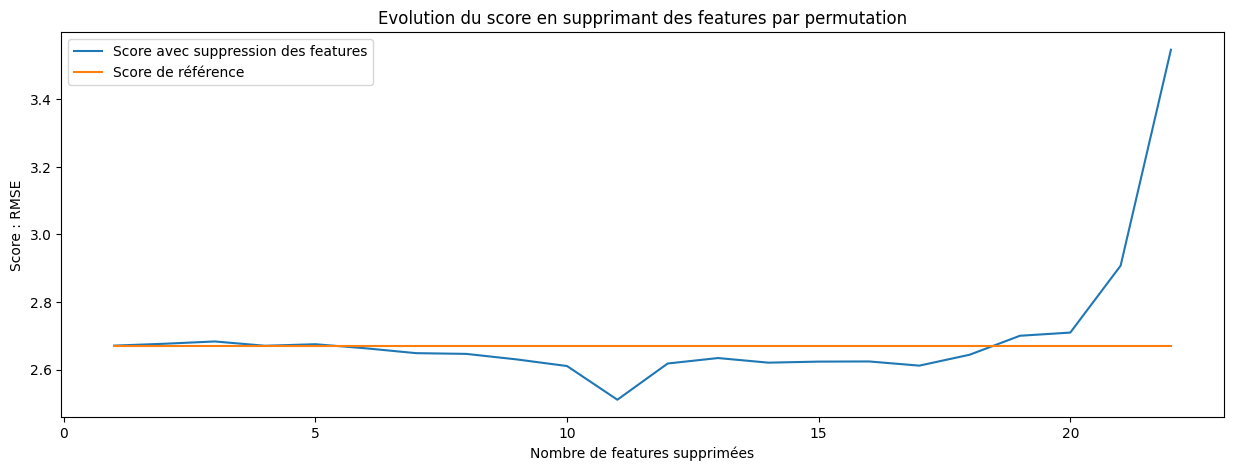

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title('Evolution du score en supprimant des features par permutation')
sns.lineplot( x = graphe_features['index'].values,
            y = graphe_features["RMSE"])
sns.lineplot([1,graphe_features.shape[0]],[graphe_features.iloc[0,2], graphe_features.iloc[0,2]])
plt.xlabel('Nombre de features supprimées')
plt.ylabel('Score : RMSE')
plt.legend(['Score avec suppression des features',
           'Score de référence'])
ax = plt.gca()


plt.show()

Observations :
* On n'observe un minima local pour x = 12 (soit 12 features supprimées environs). On peut supprimer 18 features en améliorant un peu le modèle.
* on observe qu'on peut supprimer jusqu'à 17 features avec un impact marginal sur le score
* on observe que la suppression des 5 dernières features est particulièrement impactante


In [ ]:
graphe_features['feature'].replace({
    'x0_' : 'BuildingType', 
    'x1_' : 'PrimaryPropertyType',
    'x2_' : 'Neighborhood',
    'x3_' : 'LargestPropertyUseType',
    'x4_' : 'SecondLargestPropertyUseType',
    'x5_' : 'ThirdLargestPropertyUseType', 
    'x6_' : 'Outlier'
}, inplace=True)

Le graphe ci-dessus peut être également affiché sous la façon suivante, en affichant le nom des features identifier leur importance relative

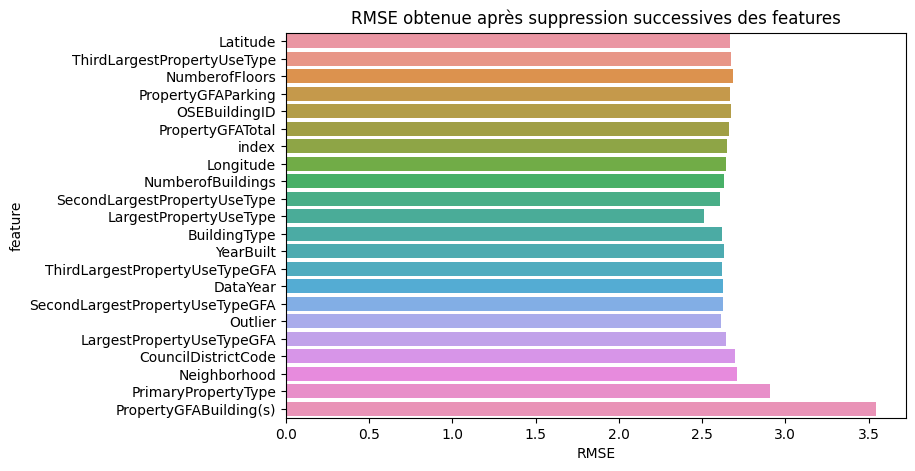

In [ ]:
plt.figure(figsize=(8,5))
plt.title('RMSE obtenue après suppression successives des features')
sns.barplot(x = graphe_features['RMSE'],
           y = graphe_features['feature'])
plt.show()

### Bilan des permutations

Les résultats obtenus ci-dessus sont assez cohérents avec l'enjeu de la 
* les 2 features les plus significatives sont la surface dédiée à l'usage principal du bâtiment et son usage principal.
* La latitude a plus d'importance que la longitude. C'est peut être lié à la configuration de la ville, dont la distance nord sud est plus importante que la distance est-ouest (voir représentation cartographique dans l'analyse de données).
* certaines features sont d'importance moyenne : type de bâtiment, nombre de bâtiments, nombre d'étages 3ème type d'usage. 

Pour simplifier la collecte de données, on pourrait éventuellement réduire notre jeu de données aux features suivantes avec une dégradation minimale du score :
* LargestPropertyUseTypeGFA
* LargestPropertyUseType
* Numberoffloors
* Latitude
* Building Type

On ourrait aussi légèrement améliorer le modèle en supprimant les 5 features suivantes du jeu de données: 
* ThirdLargestPropertyUseType
* Longitude
* PrimaryPropertyType

## Méthode Ascendante

Contraire de la méthode par permutation : à chaque tour de boucle, on teste l'ajout d'une feature et on garde la feature qui améliore le plus le score. On boucle sur toutes les features jusqu'à toutes les avoir intégrées 

sur le principe la méthode fonctionne mais il faurait la reprendre avec les mêmes mises mise à jour que les permutations : cross validation et sélection par lot de features du one hot encoding

In [ ]:
'''import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Boucle i sur le nombre de features:
    #boucle j sur le nombre de features:
        #fit du modèle avec i+1 features (feature pré sélectionnées + chaque feature 1 à 1) sur jeu de training
        #calcul du score sur jeu de test
    #on garde la feature j avec le plus petit score
    
#variables
X_train_ascend = pd.DataFrame(np.ones(X_train.shape[0]))
X_test_ascend = pd.DataFrame(np.ones(X_test.shape[0]))

#choix du modèle utilisé : 

#model = xgb_grid.best_estimator_
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

#définition des paramètres
list_features = list(range(X_test.shape[1])) #liste d'entiers
features_score_asc = []
features_kept = []
features_score = []

for i in list_features:
    scores = []
    features_left = list(set(list_features) - set(features_kept)) # liste d'entiers 
    print('features_left', len(features_left))
    for j in features_left:
        #on entraine le modèle avec la feature supplémentaire
        #print('X_train_ascend : ',X_train_ascend.shape)
        #print('X_train ', X_train.shape)
        #print('X_train.iloc[:,j] ', X_train.iloc[:,j].shape)
        #print('y_train ', y_train.shape)
        #print('concat : ', pd.concat([X_train_ascend,pd.DataFrame(X_train.iloc[:,j]).reset_index(drop=True)],axis=1).shape)
        
        
        model.fit(
            pd.concat(
                [X_train_ascend,
                 pd.DataFrame(X_train.copy().iloc[:,j]).reset_index(drop=True)
                ],axis=1),
            y_train)
        
        #on enregistre le score de ce modèle
        scores.append(
            math.sqrt(
                mean_squared_error(
                    model.predict(
                        pd.concat([X_test_ascend,
                                   pd.DataFrame(X_test.iloc[:,j]).reset_index(drop=True)
                                  ],axis=1)),
                    y_test)
            )
        )
        
        
    #sauvegarde de la feature et de son score
    features_score_asc.append(min(scores))
    feature_kept_index = scores.index(min(scores))
    features_kept.append(features_left[feature_kept_index]) #on enregistre la feature dans feature kept
    
    #mise à jour du jeu de données avec la feature supplémentaire
    X_train_ascend = pd.concat([X_train_ascend, 
                                pd.DataFrame(X_train.iloc[:, features_left[feature_kept_index]
                                                         ]).reset_index(drop=True)], axis=1)
    X_test_ascend  = pd.concat([X_test_ascend,
                                pd.DataFrame(X_test.iloc[:,  features_left[feature_kept_index]
                                                        ]).reset_index(drop=True)], axis=1)
    
    print('Tour {}. Feature ajoutée : {}. Score : {}'.format(i+1, features_kept[-1], features_score_asc[-1]))

asc_score = pd.DataFrame({'Feature' : features_kept,
                          'Score' : features_score_asc})'''

"import warnings\nwarnings.simplefilter(action='ignore', category=FutureWarning)\n\n#Boucle i sur le nombre de features:\n    #boucle j sur le nombre de features:\n        #fit du modèle avec i+1 features (feature pré sélectionnées + chaque feature 1 à 1) sur jeu de training\n        #calcul du score sur jeu de test\n    #on garde la feature j avec le plus petit score\n    \n#variables\nX_train_ascend = pd.DataFrame(np.ones(X_train.shape[0]))\nX_test_ascend = pd.DataFrame(np.ones(X_test.shape[0]))\n\n#choix du modèle utilisé : \n\n#model = xgb_grid.best_estimator_\nmodel = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=1, gamma=0,\n             importance_type='gain', learning_rate=0.1, max_delta_step=0,\n             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,\n             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,\n             reg_alpha=0, reg_lambda=1, scale_pos_weig

# Modèle Emissions

In [ ]:
y2 = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X2 = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X2[numerical_columns] = ss.fit_transform(X2[numerical_columns])
ohe.fit_transform(X2[categorical_columns])

X2 = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X2[categorical_columns])),
        left_index = True, right_index = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = \
                        train_test_split(X2, 
                                         y['TotalGHGEmissions'],  
                                         test_size = 0.3, 
                                         random_state = 42
                                        )


In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}



In [ ]:
rfr_emissions = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_emissions.fit(X_train2, y_train2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
model_emissions = rfr_emissions.best_estimator_

Export du modèle

In [ ]:
filename = 'models/' + 'rfr_emissions' + '.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(model_emissions, filehandler)

In [ ]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))

114.62075386651378

In [ ]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))/y_test2.mean()

1.0287035125500024

23 % d'écart de la RMSE à la moyenne du jeu de test

<Axes: >

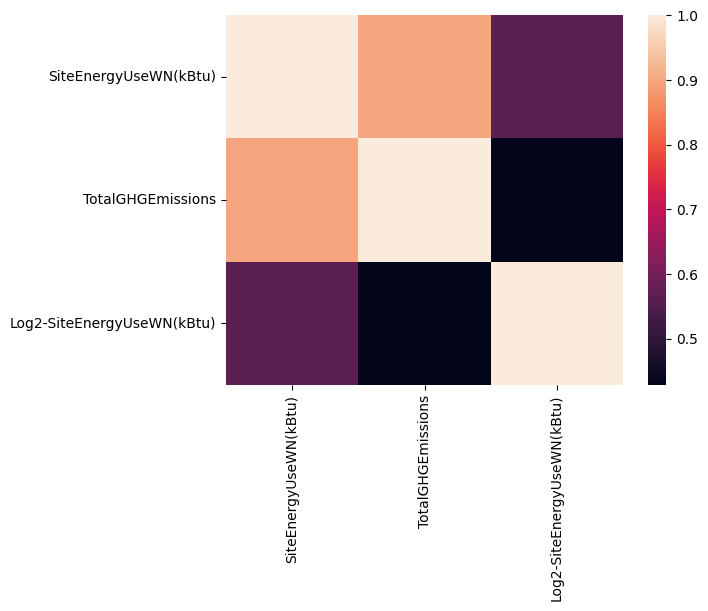

In [ ]:
sns.heatmap(y2.corr())

On observe que les variables d'émissions et de consommation sont fortement corrélées (coefficient de 0,72). Voyons si nous pouvons entrainer un modèle d'estimation des émissions à partir de la sortie du modèle de prédiction des consommations

In [ ]:
rfr_emissions_court = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

In [ ]:
rfr_emissions_court.fit(np.vstack([dict_modeles['Random Forest Regressor'].predict(X_train2), np.ones(X_train2.shape[0])]).T,
                          y_train2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   4.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
math.sqrt(mean_squared_error(rfr_emissions_court.best_estimator_.predict(
    np.vstack([dict_modeles['Random Forest Regressor'].predict(X_test2), np.ones(X_test2.shape[0])]).T),
                             y_test2))

128.06361530586383

La RMSE est quasiment égale que dans le cas du modèle avec toutes les features

Essayons en ajoutant en entrée du modèle de prédiction, la prédiction du modèle initial ainsi que les 5 features importantes du modèle initial, selon la permutation

In [ ]:
data.head(1)

BuildingType                  PrimaryPropertyType  YearBuilt  \
0  NonResidential  Residence/Hotel/Senior Care/Housing  1927        

   NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  1.0                12              88434              

                LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0  Residence/Hotel/Senior Care/Housing  88434.0                     

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  Log2-SiteEnergyUseWN(kBtu)  
0  7456910.0              249.98             22.830147

In [ ]:
columns_feature_emissions = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 'x0_Campus', 'x0_Multifamily HR (10+)',
       'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
       'x0_NonResidential', 'x0_Nonresidential COS', 'x0_SPS-District K-12',
       'x1_Education', 'x1_Facility', 'x1_Health', 'x1_Leisure', 'x1_Office',
       'x1_Offices', 'x1_Other', 'x1_Residence/Hotel/Senior Care/Housing',
       'x1_Retail', 'x1_Storage', 'x1_Supermarket / Grocery Store',
       'x1_Warehouse', 'x2_Education', 'x2_Facility', 'x2_Health',
       'x2_Leisure', 'x2_Office', 'x2_Offices', 'x2_Other', 'x2_Parking',
       'x2_Residence/Hotel/Senior Care/Housing', 'x2_Retail', 'x2_Storage']
# ['LargestPropertyUseTypeGFA', 'x3_Education', 'x3_Facility', 'x3_Health',
#        'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
#        'x3_Personal Services (Health/Beauty, Dry Cleaning, etc)',
#        'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage', 
#                             'NumberofFloors', 'Latitude', 'x0_Campus', 'x0_Multifamily HR (10+)',
#        'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
#        'x0_NonResidential', 'x0_Nonresidential COS', 'x0_Nonresidential WA',
#        'x0_SPS-District K-12']


In [ ]:
dict_modeles['Random Forest Regressor'].predict(X_train2).reshape(-1,1).shape

(652, 1)

In [ ]:
X_train2.columns

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 'x0_Campus', 'x0_Multifamily HR (10+)',
       'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
       'x0_NonResidential', 'x0_Nonresidential COS', 'x0_SPS-District K-12',
       'x1_Education', 'x1_Facility', 'x1_Health', 'x1_Leisure', 'x1_Office',
       'x1_Offices', 'x1_Other', 'x1_Residence/Hotel/Senior Care/Housing',
       'x1_Retail', 'x1_Storage', 'x1_Supermarket / Grocery Store',
       'x1_Warehouse', 'x2_Education', 'x2_Facility', 'x2_Health',
       'x2_Leisure', 'x2_Office', 'x2_Offices', 'x2_Other', 'x2_Parking',
       'x2_Residence/Hotel/Senior Care/Housing', 'x2_Retail', 'x2_Storage'],
      dtype='object')

In [ ]:
X_train2[columns_feature_emissions].shape

(652, 35)

In [ ]:
rfr_emissions_court2 = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_emissions_court2.fit(np.hstack([dict_modeles['Random Forest Regressor'].predict(X_train2).reshape(-1,1), X_train2[columns_feature_emissions].to_numpy()]),
                          y_train2)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   4.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
math.sqrt(mean_squared_error(rfr_emissions_court2.predict(
    np.hstack([dict_modeles['Random Forest Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),y_test2))

105.58226135459842

Ce résultat est très satisfaisant : la RMSE est encore plus faible que pour le modèle entraîné initialement sans la consommation.

Export du modèle

In [ ]:
filename = 'models/' + 'rfr_emissions' + '.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(rfr_emissions_court2, filehandler)

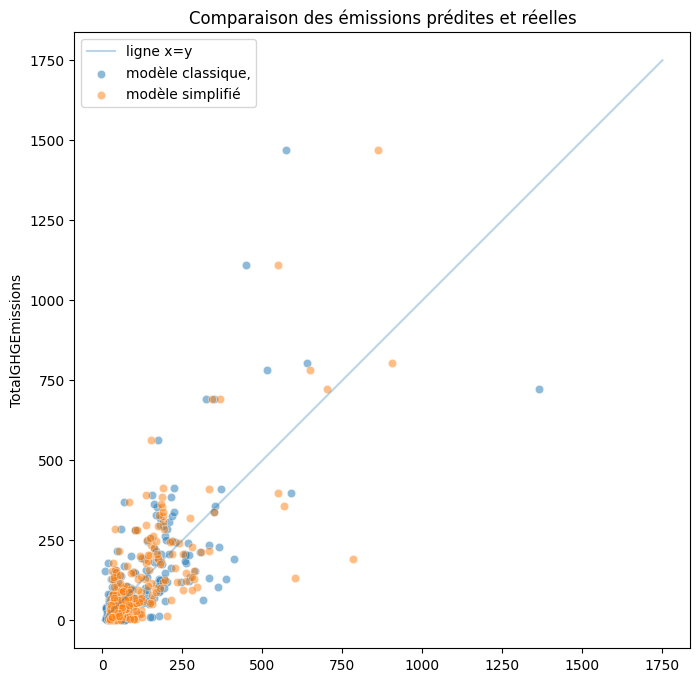

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Comparaison des émissions prédites et réelles')
sns.lineplot(x = [0,1750], y = [0,1750], alpha=0.3)
sns.scatterplot(x = model_emissions.predict(X_test2),
                y = y_test2, alpha=0.5)
sns.scatterplot(x = rfr_emissions_court2.predict(np.hstack([dict_modeles['Random Forest Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),
                y = y_test2, alpha=0.5)
plt.legend(['ligne x=y', 'modèle classique,', 'modèle simplifié'])
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

# Intérêt du Energy Star Score

Entrainons un nouveau modèle avec le Energy Star Score

In [ ]:
X_en = X.copy()

In [ ]:
X_en['energy_star_score'] = energy_star_score

In [ ]:
y_en = y['Log2-SiteEnergyUseWN(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [ ]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = \
                        train_test_split(X_en, 
                                         y_en,  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )


In [ ]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

1.7828929677539485

Entrainons un autre modèle avec les mêmes données sans le Energy Star Score

In [ ]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

KeyError: "['energy_star_score'] not found in axis"

In [ ]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

1.7765650560461927

In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

1.7765650560461927

Le résultat obtenu ici avec le Energy Star Score est bien moins bon que le modèle initial, où on avait davantage de données (1500 obsevations supplémentaires). On voit cependant qu'à iso échantillon, le Energy Star Score améliore très légèrement la performance et semble donc pertinent . Cependant, dans la mesure où:
* il est manquant pour un certain nombre de données de l'échantillon (et donc potentiellement des futurs bâtiments pour lesquels il faudra faire tourner le modèle)
* il est fastidieux à calculer

On peut tout à fait se passer du Energy Star Score au prix d'un modèle légèrement moins précis (cf parties précédentes du notebook) mais avec une complexité moindre pour l'ensemble du processus. Dans le cas où les équipes parviendraient à estimer de façon simple le Energy Star Score, la question serait à reconsidérer et il serait alors pertinent de l'intégrer au modèle

# Fonction de prédiction complète

NB : pour préparer le fichiµer avant prédiction, voir notebook "nettoyage_analyse"

Le jeu final retenu pour le modèle de consommation est le Random Forest Regressor entraîné sur toutes les features et avec les paramètres suivants: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
Le jeu final retenu pour le modèle émissions est en random forest regressor entraîné sur le jeu de données réduit (voir partie associée)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import pickle



def prediction_from_scratch(file_path, model_path = './models/'):
    '''Chargement et application du modèle de prédiction à un jeu de données spécifique, 
    à partir du .csv du jeu de données
    
    NB : le jeu de données devra avoir été préalablement nettoyé par application de la 
    fonction import_clean à la fin du notebook de nettoyage et d'analyse.

    Paramètres : 
    * file_path : chemin tu fichier .csv
    * model_path : répertoire des modèles 

    Retour : consommation du site (en kBtu) et émissions '''

    #préparation des données
    try:
        dataframe = pd.read_csv(file_path)
    except:
        print('Erreur dans le chargement des données')

    #préparation des features:

    colonnes = ['index', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Outlier',
       'Latitude', 'Longitude']
    
#     columns_feature_emissions = ['LargestPropertyUseTypeGFA', 'x3_Education', 'x3_Facility', 'x3_Health',
#        'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
#        'x3_Personal Services (Health/Beauty, Dry Cleaning, etc)',
#        'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage', 
#                             'NumberofFloors', 'Latitude', 'x0_Campus', 'x0_Multifamily HR (10+)',
#        'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
#        'x0_NonResidential', 'x0_Nonresidential COS', 'x0_Nonresidential WA',
#        'x0_SPS-District K-12']
    columns_feature_emissions = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseTypeGFA', 'x0_Campus', 'x0_Multifamily HR (10+)',
       'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
       'x0_NonResidential', 'x0_Nonresidential COS', 'x0_SPS-District K-12',
       'x1_Education', 'x1_Facility', 'x1_Health', 'x1_Leisure', 'x1_Office',
       'x1_Offices', 'x1_Other', 'x1_Residence/Hotel/Senior Care/Housing',
       'x1_Retail', 'x1_Storage', 'x1_Supermarket / Grocery Store',
       'x1_Warehouse', 'x2_Education', 'x2_Facility', 'x2_Health',
       'x2_Leisure', 'x2_Office', 'x2_Offices', 'x2_Other', 'x2_Parking',
       'x2_Residence/Hotel/Senior Care/Housing', 'x2_Retail', 'x2_Storage']
    colonnes_choisi = [ 'YearBuilt', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA']
# 'PropertyGFATotal': Superficie totale du bien immobilier (en pieds carrés)
# 'PropertyGFAParking': Superficie de stationnement du bien immobilier (en pieds carrés)
# 'PropertyGFABuilding(s)': Superficie du bâtiment(s) du bien immobilier (en pieds carrés)
# 'LargestPropertyUseType': Type d'utilisation principal le plus important
# 'LargestPropertyUseTypeGFA': Superficie d'utilisation principale la plus importante (en pieds carrés)
    X = dataframe.copy()[colonnes]

    #chargement des modèles
    dict_modeles_prediction = {}
    for filename in glob.glob(str(model_path + '*')):
        with open(filename, 'rb') as filehandler:
            if 'onehotencoder.obj' in filename:
                onehotencoder = pickle.load(filehandler)
                
            elif 'standardscaler.obj' in filename:
                ss = pickle.load(filehandler)
            else:
                dict_modeles_prediction[filename] = pickle.load(filehandler)
                if 'Random Forest Regressor.obj' in filename:
                    modele_consommation = dict_modeles_prediction[filename]
                elif 'rfr_emissions.obj' in filename:
                    modele_emissions = dict_modeles_prediction[filename]
    
    categorical_columns = X.select_dtypes(['category','object']).columns
    numerical_columns = X.select_dtypes(['int64', 'float32','int32','float64']).columns
    print(numerical_columns)
    print(X.dtypes)
    X[colonnes_choisi] = ss.transform(X[colonnes_choisi])
    onehotencoder.transform(X[categorical_columns])
#     X = onehotencoder.fit_transform(X[categorical_columns])


    X = pd.merge(X[numerical_columns], 
              pd.DataFrame(columns = onehotencoder.get_feature_names().tolist(),
                  data = onehotencoder.transform(X[categorical_columns])),
            left_index = True, right_index = True)
    regex = re.compile(r'x\d_')
    for column in X.columns:
        if regex.search(column):
            X[column] = X[column].astype('int32')

    #application des 2 modèles
    #   prédiction consommations
    consommation = modele_consommation.predict(X)
    #   dénormalisation : application np.exp2
    consommation = np.exp2(consommation)
    #prédiction émissions
    emissions = modele_emissions.predict(np.hstack([modele_consommation.predict(X).reshape(-1,1), 
               X[columns_feature_emissions].to_numpy()]))
    
    return pd.DataFrame(list(zip(consommation, emissions)), columns=['Consommation', 'Emissions'], index = X.index)

In [ ]:
prediction_from_scratch('data/data_cleaned.csv')

Index(['index', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'Latitude', 'Longitude'],
      dtype='object')
index                              int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLarg

ValueError: X has 7 features, but OneHotEncoder is expecting 3 features as input.

In [ ]:
pd.read_csv('data/data_cleaned - reduit_5L.csv')

index  DataYear        BuildingType                  PrimaryPropertyType  \
0  0      2015      NonResidential      Residence/Hotel/Senior Care/Housing   
1  5      2015      Nonresidential COS  Other                                 
2  6      2015      NonResidential      Residence/Hotel/Senior Care/Housing   
3  7      2015      NonResidential      Other                                 
4  8      2015      NonResidential      Residence/Hotel/Senior Care/Housing   

   CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  \
0  7                    DOWNTOWN     1927       1.0                 
1  7                    DOWNTOWN     1999       1.0                 
2  7                    DOWNTOWN     1926       1.0                 
3  7                    DOWNTOWN     1926       1.0                 
4  7                    DOWNTOWN     1904       1.0                 

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0  12.0            88434             0                    
1  2.0             97288             37198                
2  11.0            83008             0                    
3  8.0             102761            0                    
4  15.0            163984            0                    

   PropertyGFABuilding(s)               LargestPropertyUseType  \
0  88434                   Residence/Hotel/Senior Care/Housing   
1  60090                   Offices                               
2  83008                   Residence/Hotel/Senior Care/Housing   
3  102761                  Leisure                               
4  163984                  Residence/Hotel/Senior Care/Housing   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0  88434.0                    Other                         
1  88830.0                    Other                         
2  81352.0                    Other                         
3  102761.0                   Other                         
4  163984.0                   Other                         

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0  0.0                              Other                        
1  0.0                              Other                        
2  0.0                              Other                        
3  0.0                              Other                        
4  0.0                              Other                        

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
0  0.0                             65.0             7097539.0               
1  0.0                            NaN               13045258.0              
2  0.0                             25.0             6477493.0               
3  0.0                            NaN               7380086.0               
4  0.0                             46.0             13589025.0              

  Outlier   Latitude   Longitude  TotalGHGEmissions  \
0  Normal  47.612190 -122.337997  249.43              
1  Normal  47.616439 -122.336764  304.62              
2  Normal  47.614114 -122.332741  208.46              
3  Normal  47.612902 -122.331309  199.99              
4  Normal  47.602589 -122.332553  331.61              

   Log2-SiteEnergyUseWN(kBtu)  
0  22.758888                   
1  23.637022                   
2  22.627004                   
3  22.815206                   
4  23.695939

 # Complément : Assemblage de modèles

En bonus sur ce qui est attendu pour ce projet :
Régression linéaire pour faire une prédiction à partir de l'ensemble des prédictions obtenues par les différents modèles

In [ ]:
dict_modeles.keys()

dict_keys(['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost', 'models\\Elastic Net.obj', 'models\\Random Forest Regressor.obj', 'models\\rfr_emissions.obj', 'models\\SVM.obj', 'models\\XGBoost.obj'])

In [ ]:
dict_modeles_final = {k: v for k, v in dict_modeles_new.items() if k in ['models\\Elastic Net.obj', 
                                                                         'models\\Random Forest Regressor.obj',
                                                                         'models\\SVM.obj', 
                                                                         'models\\XGBoost.obj']}

In [ ]:
dict_modeles_final['XGBOOST'] = xgb_grid.best_estimator_

In [ ]:
dict_modeles_final.keys()

dict_keys(['models\\Elastic Net.obj', 'models\\Random Forest Regressor.obj', 'models\\SVM.obj', 'models\\XGBoost.obj', 'XGBOOST'])

In [ ]:
dict_modeles_final['XGBOOST'].feature_importances_

array([0.03350953, 0.00994746, 0.05539715, 0.06372814, 0.06473049,
       0.        , 0.00490916, 0.00512696, 0.00307723, 0.01382987,
       0.        , 0.03543116, 0.00856353, 0.01287788, 0.04539553,
       0.03065579, 0.        , 0.03900915, 0.04646592, 0.00618919,
       0.02296219, 0.00812006, 0.14021994, 0.02161191, 0.        ,
       0.043736  , 0.        , 0.        , 0.00357266, 0.00108069,
       0.00415817, 0.        , 0.1255612 , 0.01335792, 0.13677514],
      dtype=float32)

In [ ]:
del dict_modeles_final['models\\XGBoost.obj']

In [ ]:
import math

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.utils import resample

X_final_train = pd.DataFrame()
X_final_test = pd.DataFrame()

liste_resultats_modeles = {}
for key, modele_charge in dict_modeles_final.items():
    liste_score = []
    print(key)
    
    X_final_train2 = pd.DataFrame(modele_charge.predict(X_train), columns = [key])
    X_final_test2 = pd.DataFrame(modele_charge.predict(X_test), columns=[key])
    
    
    if X_final_train.empty :
        X_final_train = X_final_train2
        X_final_test = X_final_test2
    else:
        X_final_train = pd.concat((X_final_train, X_final_train2), axis=1)
        X_final_test  = pd.concat((X_final_test , X_final_test2 ), axis=1)
        
    print(X_final_train.shape)
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
ridge = GridSearchCV(estimator = Ridge(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

ridge.fit(X_final_train, y_train)

print('RMSE finale : ', math.sqrt(mean_squared_error(ridge.best_estimator_.predict(X_final_test), y_test)))


models\Elastic Net.obj
(745, 1)
models\Random Forest Regressor.obj
(745, 2)
models\SVM.obj
(745, 3)
XGBOOST
(745, 4)
RMSE finale :  2632859.607592247


On obtient une RMSE finale de 0,6300, très légèrement inférieure à la valeur obtenut avec Random Forest (0,6304), le modèle final peut donc être légèrement amélioré en intégrant cette prédiction, au prix d'une complexité supplémentaire.

In [ ]:
print(X_final_train.columns)

Index(['models\Elastic Net.obj', 'models\Random Forest Regressor.obj',
       'models\SVM.obj', 'XGBOOST'],
      dtype='object')


In [ ]:
importance_modeles = pd.DataFrame({'modele' : X_final_train.columns,
              'coefficient (abs)' :  abs(ridge.best_estimator_.coef_)})

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
# import pandas as pd
# import numpy as np

# # Aplatir la colonne X_final_train.columns
# flattened_columns = np.array(X_final_train.columns).flatten()

# # Créer le DataFrame avec les colonnes aplaties
# importance_modeles = pd.DataFrame({'modele': flattened_columns,
#                                    'coefficient (abs)': abs(ridge.best_estimator_.coef_)})


ValueError: Per-column arrays must each be 1-dimensional

NameError: name 'importance_modeles' is not defined

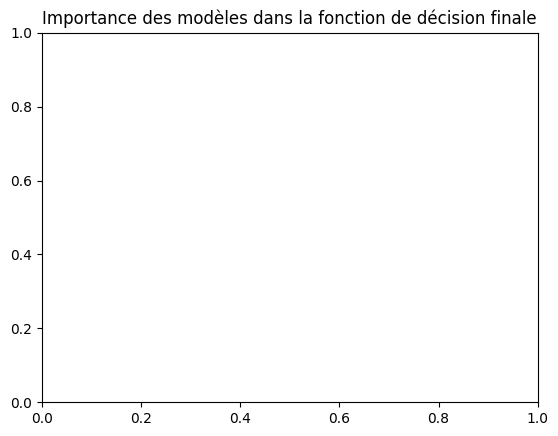

In [ ]:
plt.title('Importance des modèles dans la fonction de décision finale')
sns.barplot(x = importance_modeles['modele'],
           y = importance_modeles['coefficient (abs)'])

#  Complément : Bootstrap

Reprendre le bootstrap pour avoir un élément de confiance dans la prédiction : on espère que plus l'erreur est grande plus la variance des prédictions obtenues par bootstrap est grande. Ce qui apporte beaucoup d'informations.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
scores = []
model_bootstrap = []
y_pred = []
yvar = []
for i in range(100):
    print('Echantillon ',i+1)
    #on choisit un échantillon bootstrap de l'ensemble du frame
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, 
                                                        replace=True, n_samples = X_train.shape[0])
    #instanciation du modèle
    model_bootstrap.append(RandomForestRegressor(n_jobs = -1, 
                                            max_features = 'sqrt', 
                                            min_samples_leaf = 1,
                                            n_estimators = 500))
    
    model_bootstrap[-1].fit(X_train_bootstrap, y_train_bootstrap)
    
    y_pred.append(model_bootstrap[-1].predict(X_test))
    scores.append(y_pred[i] - y_test.iloc[i])

y_pred = np.array(y_pred)
scores = np.array(scores)
var = []
score = []
for i in range(y_pred.shape[0]):
    var.append(np.var(y_pred[i,:]))
    score.append(np.mean(scores[i,:]))

Echantillon  1
Echantillon  2
Echantillon  3
Echantillon  4
Echantillon  5
Echantillon  6
Echantillon  7
Echantillon  8
Echantillon  9
Echantillon  10
Echantillon  11
Echantillon  12
Echantillon  13
Echantillon  14
Echantillon  15
Echantillon  16
Echantillon  17
Echantillon  18
Echantillon  19
Echantillon  20
Echantillon  21
Echantillon  22
Echantillon  23
Echantillon  24
Echantillon  25
Echantillon  26
Echantillon  27
Echantillon  28
Echantillon  29
Echantillon  30
Echantillon  31
Echantillon  32
Echantillon  33
Echantillon  34
Echantillon  35
Echantillon  36
Echantillon  37
Echantillon  38
Echantillon  39
Echantillon  40
Echantillon  41
Echantillon  42
Echantillon  43
Echantillon  44
Echantillon  45
Echantillon  46
Echantillon  47
Echantillon  48
Echantillon  49
Echantillon  50
Echantillon  51
Echantillon  52
Echantillon  53
Echantillon  54
Echantillon  55
Echantillon  56
Echantillon  57
Echantillon  58
Echantillon  59
Echantillon  60
Echantillon  61
Echantillon  62
Echantillon  63
E

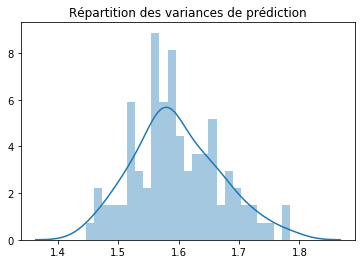

In [ ]:
plt.title('Répartition des variances de prédiction')
sns.distplot(var, bins = 25)

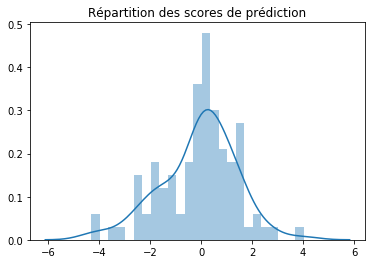

In [ ]:
plt.title('Répartition des scores de prédiction')
sns.distplot(score, bins = 25)

In [ ]:
for i, el in enumerate(score):
    score[i] = abs(el)

Text(0, 0.5, 'variance')

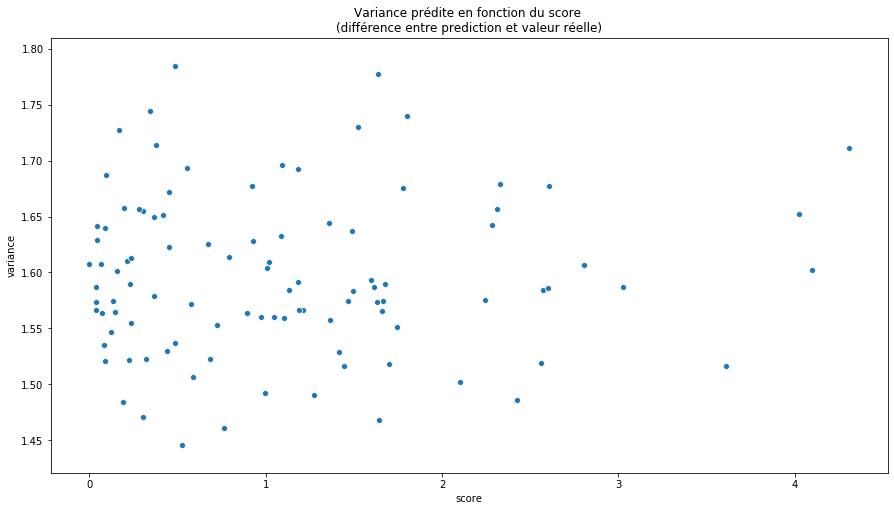

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Variance prédite en fonction du score \n(différence entre prediction et valeur réelle)')
sns.scatterplot(x = score, y = var)
plt.xlabel('score')
plt.ylabel('variance')

In [ ]:
np.corrcoef(score , var)

array([[1.        , 0.04422661],
       [0.04422661, 1.        ]])

In [ ]:
# Chargement des données
df = pd.read_csv('data/data_cleaned.csv')

In [ ]:
df.dtypes

index                              int64  
OSEBuildingID                      int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier    

In [ ]:
print(df.columns)

Index(['index', 'OSEBuildingID', 'DataYear', 'BuildingType',
       'PrimaryPropertyType', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'Outlier', 'TotalGHGEmissions',
       'Log2-SiteEnergyUseWN(kBtu)'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données
df = pd.read_csv('data/data_cleaned.csv')

# Vérification de la présence de la colonne 'TotalGHGEmissions'
if 'TotalGHGEmissions' not in df.columns:
    raise ValueError("La colonne 'TotalGHGEmissions' est introuvable dans le jeu de données")

# Suppression des colonnes inutiles pour la prédiction
# df.drop(['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier'], axis=1, inplace=True)

# Traitement des variables catégorielles avec OneHotEncoder
cat_cols = [col for col in df.columns if df[col].dtype in ['object', 'category']]
print(cat_cols)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Traitement des variables numériques avec StandardScaler
num_cols = [col for col in df.columns if df[col].dtype in ['int8', 'float32','int64', 'float64']]
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Préparation du préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

# Préparation des données pour l'apprentissage
df = df.reset_index(drop=True) # resynchroniser les index
# y = df['TotalGHGEmissions']
# X = df.drop('TotalGHGEmissions', axis=1)
print(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des modèles à tester avec GridSearchCV
models = [
    {
        'name': 'LinearRegression',
        'estimator': LinearRegression(),
        'hyperparameters': {}
    },
    {
        'name': 'Lasso',
        'estimator': Lasso(),
        'hyperparameters': {
            'alpha': [0.1, 1, 10]
        }
    },
    {
        'name': 'Ridge',
        'estimator': Ridge(),
        'hyperparameters': {
            'alpha': [0.1, 1, 10]
        }
    },
    {
        'name': 'RandomForestRegressor',
        'estimator': RandomForestRegressor(),
        'hyperparameters': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None]
        }
    }
]

# Entraînement et évaluation des modèles avec GridSearchCV et cross-validation
for model in models:
    print(f"Training {model['name']}...")
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model['estimator'])
    ])
    grid = GridSearchCV(pipe, model['hyperparameters'], cv=5, scoring='r2')
    scores = cross_val_score(grid, X_train, y_train, cv=5, scoring='r2')
    grid.fit(X_train, y_train)
    print(f"Best parameters: {grid.best_params_}")
    print(f"Training R2 score: {grid.score(X_train, y_train):.4f}")
    print(f"Test R2 score: {grid.score(X_test, y_test):.4f}")

['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'Outlier']
     YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0   -1.149233  -0.020513           1.516661       -0.028003           
1    0.199175  -0.020513           6.873033        7.457116           
2   -1.181338  -0.020513           1.147256       -0.261906           
3   -1.181338  -0.020513           1.331958       -0.074811           
4   -1.887647  -0.020513           2.070768        0.623739           
5    0.199175  -0.020513           1.331958        0.530390           
6    1.130218  -0.020513           3.917793        2.083295           
7   -1.117128  -0.020513           0.962554       -0.230082           
8    0.552329  -0.020513           5.395413        1.934710           
9   -1.309758  -0.020513           1.331958        0.004398           
10   0.648644  -0.020513           4.471900        2.800211    

Training LinearRegression...


ValueError: A given column is not a column of the dataframe